In [1]:
# Add DEVENV_PATH to the path so that we can import the modules
import sys
from os import getenv

import pendulum
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

from entrypoint import load_gin
load_gin("ingest-kafka", test=False)
import greenflow.analysis as an
from greenflow.utils import convert_to_mib

cutoff_begin = "2024-12-16T03:15:35.626996+01:00"
cutoff_end = '2025-02-13T00:07:45.003999+01:00'
# cutoff_end = pendulum.now().to_iso8601_string()

load_gin(exp_name="ingest-kafka", test=False)
# cutoff_end


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with the replace error handler:
'OutStream' object has no attribute 'reconfigure'


In [2]:
def plot_throughput_vs_memory(enriched_data: pd.DataFrame):
    # Restack this to show memory impact 
    redpanda_df = enriched_data[enriched_data["exp_name"] == "ingest-redpanda"]
    kafka_df = enriched_data[enriched_data["exp_name"] == "ingest-kafka"]

    # Add a new column for memory in MiB
    redpanda_df['broker_mem_mib'] = redpanda_df['broker_mem'].apply(convert_to_mib)
    min_throughput = min(redpanda_df['throughput_MBps'].min(), kafka_df['throughput_MBps'].min())
    min_throughput = 0
    max_throughput = max(redpanda_df['throughput_MBps'].max(), kafka_df['throughput_MBps'].max())

    kafka_df['broker_mem_mib'] = kafka_df['broker_mem'].apply(convert_to_mib)
    # plt.figure(figsize=(15, 6))
    # plt.subplot(1, 2, 1)
    sns.barplot(data=redpanda_df, x='broker_cpu', y='throughput_MBps', hue='broker_mem_mib')
    # sns.pointplot(data=redpanda_df, x='broker_mem_mib', y='throughput_MBps', hue='broker_cpu')

    # plt.title('Redpanda')
    plt.xlabel('Cores')
    plt.ylabel('Data Throughput (MBps)')
    plt.legend(title='Memory')
    plt.ylim((min_throughput - 0.05 * min_throughput, max_throughput + 0.05 * max_throughput))
    plt.grid(True)
    sns.despine()
    plt.show()

    # plt.subplot(1, 2, 2)
    # sns.scatterplot(data=kafka_df, x='broker_mem_mib', y='throughput_MBps', hue='broker_cpu', palette='viridis', alpha=0.7)
    sns.barplot(data=kafka_df, x='broker_cpu', y='throughput_MBps', hue='broker_mem_mib')
    # plt.title('Kafka')
    plt.xlabel('Cores')
    plt.ylabel('Data Throughput (MBps)')
    plt.legend(title='Memory')
    plt.ylim((min_throughput - 0.05 * min_throughput, max_throughput + 0.05 * max_throughput))
    plt.grid(True)
    sns.despine()
    plt.show()


In [8]:
common = dict(cutoff_begin=cutoff_begin, cutoff_end=cutoff_end, type="memImpact", replicationFactor=3)
ovhnvme_1 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="ovhnvme",
    type="memImpact",
    partitions=1,
)
ovhnvme_100 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="ovhnvme",
    type="memImpact",
    partitions=120,
)
ovhnvme_100 = ovhnvme_100[ovhnvme_100["broker_cpu"].astype(int) <= 8]
ovhnvme_100 = ovhnvme_100[ovhnvme_100["broker_mem"] != "25Gi"]
grappe_1 = an.full_analytical_pipeline(**common, cluster="grappe", partitions=1)
grappe_100 = an.full_analytical_pipeline(**common, cluster="grappe", partitions=120)
# taurus_1 = an.full_analytical_pipeline(**common, cluster="taurus", partitions=1)
# taurus_100 = an.full_analytical_pipeline(**common, cluster="taurus", partitions=120)

# # an.create_qgrid_widget(ovhnvme_1)

KeyError: "None of ['exp_id'] are in the columns"

In [ ]:
# taurus_1 = taurus_1[taurus_1["broker_cpu"].astype(int) <= 8]
# taurus_1 = taurus_1[taurus_1["broker_mem"] != "25Gi"]
# taurus_100 = taurus_100[taurus_100["broker_cpu"].astype(int) <= 8]
# taurus_100 = taurus_100[taurus_100["broker_mem"] != "25Gi"]
# plot_throughput_vs_memory(taurus_1)
# an.create_qgrid_widget(taurus_100)
# plot_throughput_vs_memory(taurus_100)

NameError: name 'taurus_1' is not defined

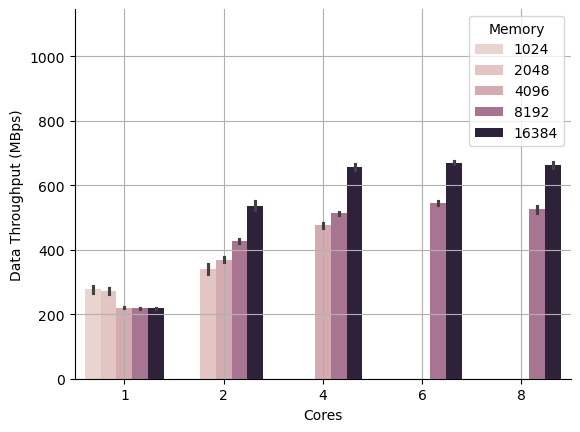

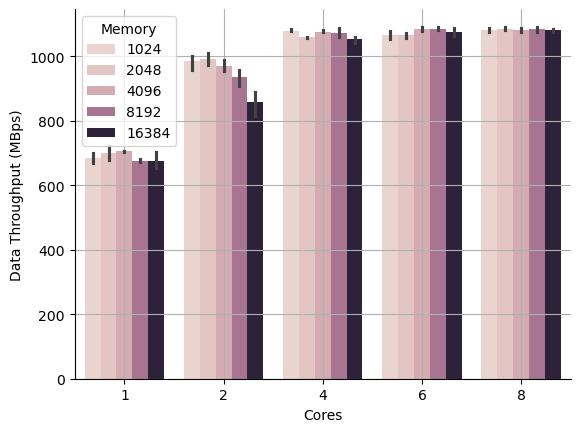

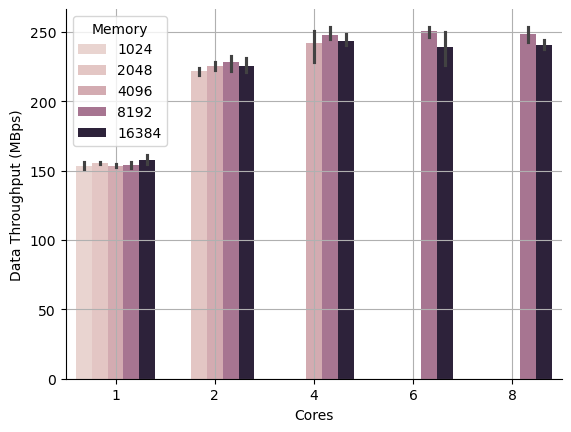

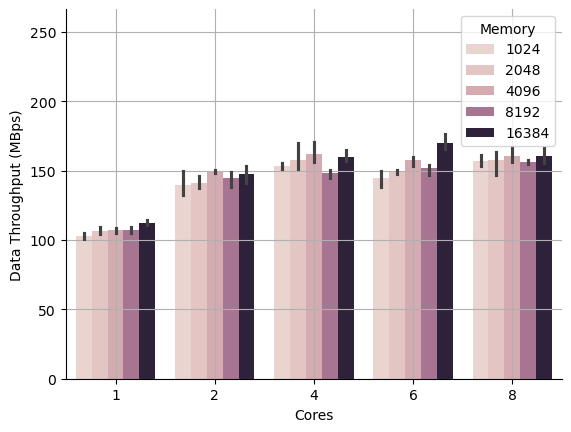

In [7]:

grappe_100 = grappe_100[grappe_100["broker_cpu"].astype(int) <= 8]
grappe_100 = grappe_100[grappe_100["broker_mem"] != "25Gi"]
# # plot_throughput_vs_memory(grappe_1)
# # an.create_qgrid_widget(grappe_100)
plot_throughput_vs_memory(grappe_100)
# an.create_qgrid_widget(grappe_100)
plot_throughput_vs_memory(ovhnvme_100)